In [2]:
%%capture
!pip install speechbrain
!pip install transformers

In [3]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio
from speechbrain.pretrained import SepformerSeparation as separator

In [4]:
model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

In [1]:
est_sources = model.separate_file(path='/content/baby_s.flac')
#est_sources = model.separate_file(path='/content/0929.flac')

NameError: ignored

In [6]:
signal  = read_audio("/content/baby_s1.flac" ).squeeze()
signal.shape

torch.Size([73728, 2])

In [7]:
len(est_sources[:, :, 0].squeeze())

72075

In [8]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [9]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

In [10]:
arr = est_sources.squeeze()

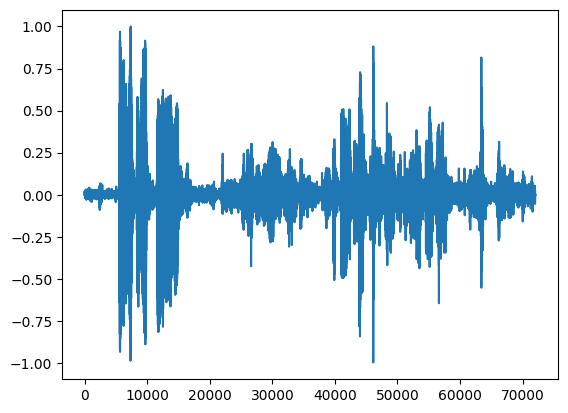

In [11]:
import matplotlib.pyplot as plt
plt.plot(arr[:,0])

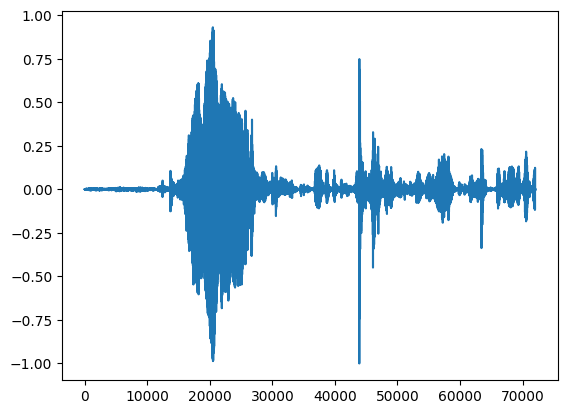

In [12]:
plt.plot(arr[:,1])

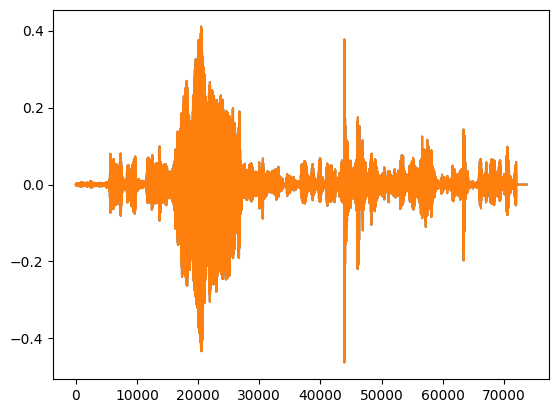

In [13]:
plt.plot(signal)

In [14]:
len(signal) , len(arr[:,1])

(73728, 72075)

In [15]:
import numpy as np
x = np.argmax(arr[:,1])
x , arr[x,1]

(tensor(20491), tensor(0.9295))

In [16]:
signal.shape

torch.Size([73728, 2])

In [17]:
x = np.argmax(signal[:,1])
x , signal[x,1]

(tensor(20491), tensor(0.4109))

In [18]:
factor = arr[x,1] / signal[x,1]
factor

tensor(2.2623)

In [19]:
rms_x1 = np.sqrt(np.mean(np.array(np.square(signal[9000:10000,1]))))
rms_x2 = np.sqrt(np.mean(np.array(np.square(arr[9000:10000,0]))))

# Calculate the scaling factor
alpha = rms_x2 / rms_x1
alpha


12.405876

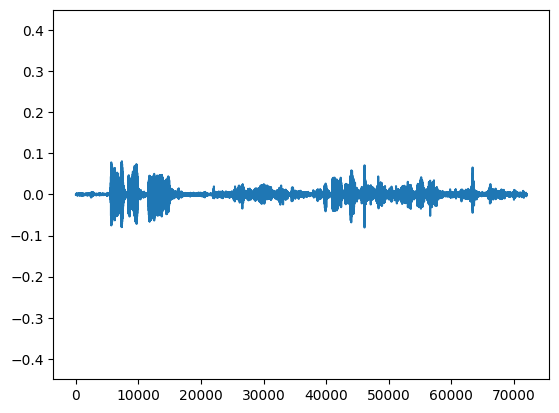

In [20]:
tmp = arr[:,0]/alpha
plt.ylim(-0.45,0.45)
plt.plot(tmp)

In [21]:
orig = signal[:,1]
print(orig[0:20]) , print(tmp[0:20])  , print(orig.shape)

tensor([ 9.1553e-05, -4.2725e-04, -1.2512e-03, -1.4954e-03, -1.3733e-03,
        -1.1902e-03, -1.4954e-03, -1.4343e-03, -1.1597e-03, -1.5259e-03,
        -1.3123e-03, -1.4343e-03, -1.4343e-03, -1.0376e-03, -1.4038e-03,
        -1.2512e-03, -7.3242e-04, -1.8311e-04, -7.6294e-04, -1.2817e-03])
tensor([4.8386e-05, 2.5276e-04, 8.2194e-04, 1.1011e-03, 1.1354e-03, 1.2009e-03,
        1.4473e-03, 1.4062e-03, 1.2765e-03, 1.3226e-03, 1.2164e-03, 1.1550e-03,
        1.0879e-03, 8.4925e-04, 1.0059e-03, 9.0733e-04, 5.7787e-04, 2.6509e-04,
        5.4668e-04, 8.7601e-04])
torch.Size([73728])


(None, None, None)

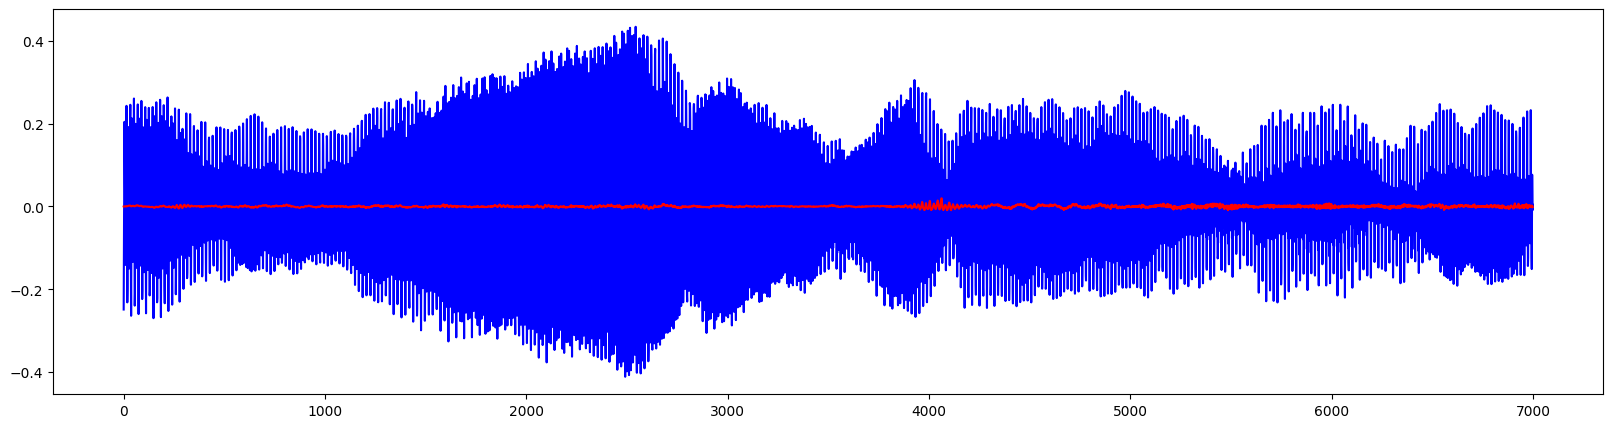

In [26]:
plt.figure(figsize=(20,5))
plt.plot(-orig[18000:25000], color = 'b' )
plt.plot(tmp[18000:25000] , color = 'r')

In [27]:
x = orig[18000:25000]
y = tmp[18000:25000]
np.corrcoef(x,y)

array([[ 1.        , -0.06582768],
       [-0.06582768,  1.        ]])

In [274]:
from scipy import signal
a = -orig[0:50]
v = signal.correlate(a, tmp[0:50] )
lags = signal.correlation_lags(len(orig[0:50]), len(tmp[0:50]))
#v /= np.max(v)

In [275]:
locc = np.argmax(v)
print(locc)
print(v[locc])
#print(lags)

49
5.014682e-05


In [281]:
import statsmodels.api as sm

#calculate cross correlation
v = sm.tsa.stattools.ccf(orig[0:50], tmp[0:50], adjusted=False)


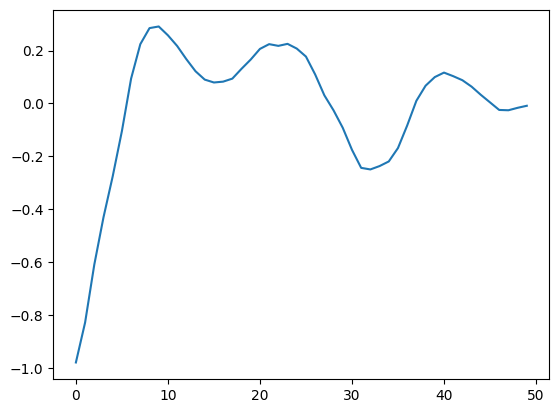

In [282]:
plt.plot(v)

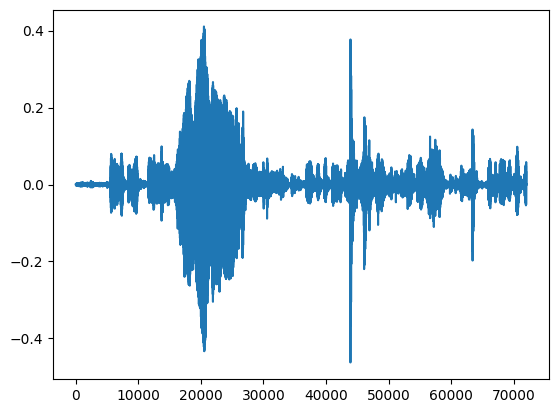

In [51]:
plt.plot(signal[0:72075,1])

In [177]:
final = orig[0:72075] + tmp
Audio(final, rate=8000)

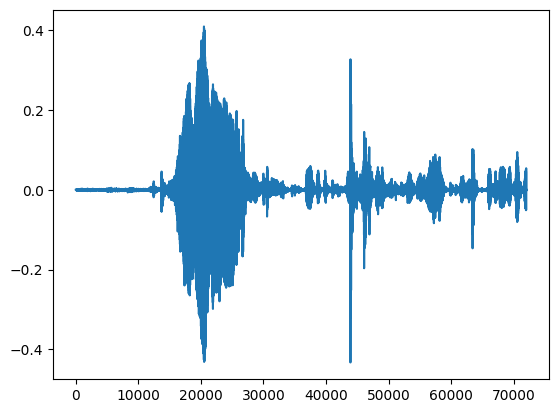

In [86]:
plt.plot(final)